In [1]:
import numpy as np
import pandas as pd

# Import Data

Importing train and test data from the given csvs.

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df_train = pd.read_csv("aps_failure_training_set.csv", na_values='na')
df_train, df_test = train_test_split(df_train, test_size=0.2, random_state=42)

In [4]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [5]:
df_train["class"].value_counts()

class
neg    47212
pos      788
Name: count, dtype: int64

In [6]:
df_test["class"].value_counts()

class
neg    11788
pos      212
Name: count, dtype: int64

In [7]:
df_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,18,0.0,2.200000e+01,20.0,0.0,0.0,0.0,0.0,0.0,...,126.0,64.0,104.0,154.0,38.0,0.0,0.0,0.0,0.0,0.0
1,neg,30,NaN,4.200000e+01,42.0,0.0,0.0,0.0,0.0,0.0,...,734.0,82.0,102.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2,neg,14,NaN,8.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,140.0,34.0,56.0,40.0,36.0,140.0,0.0,0.0,0.0,0.0
3,neg,41650,NaN,2.130706e+09,364.0,0.0,0.0,0.0,0.0,0.0,...,298444.0,174792.0,401068.0,438100.0,325162.0,166102.0,89058.0,4040.0,0.0,0.0
4,neg,59684,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,323444.0,126844.0,334944.0,483618.0,713282.0,469092.0,117246.0,802.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,neg,29690,NaN,2.120000e+03,1864.0,0.0,0.0,0.0,0.0,0.0,...,766082.0,123142.0,73606.0,17098.0,4416.0,1360.0,488.0,0.0,0.0,0.0
47996,neg,6,NaN,8.200000e+01,58.0,0.0,0.0,0.0,0.0,0.0,...,224.0,70.0,68.0,38.0,16.0,4.0,0.0,0.0,0.0,0.0
47997,neg,41694,NaN,1.880000e+02,150.0,0.0,0.0,0.0,0.0,0.0,...,405272.0,212524.0,647040.0,660432.0,79724.0,1500.0,112.0,0.0,0.0,0.0
47998,neg,142,0.0,4.400000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,1258.0,246.0,708.0,508.0,1154.0,2030.0,0.0,0.0,0.0,0.0


# PART 1

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings

In [9]:
X_train = df_train.drop(columns=["class"])
y_train = df_train["class"]

X_test = df_test.drop(columns=["class"])
y_test = df_test["class"]

# Scaling and Imputing Features

In [10]:
X_train.isna().sum()

aa_000        0
ab_000    37064
ac_000     2628
ad_000    11839
ae_000     1968
          ...  
ee_007      546
ee_008      546
ee_009      546
ef_000     2148
eg_000     2147
Length: 170, dtype: int64

In [11]:
scaler = MinMaxScaler()
imputer = SimpleImputer(strategy='mean')

In [12]:
steps = [
    ("scaler", scaler),
    ("imputer", imputer),
]

pipeline = Pipeline(steps=steps)
X_train = pipeline.fit_transform(X_train)

I have used pipeline as the above 2 steps (scaling and imputing) should be performed on any input X to the model. This keeps the workflow systematic and concise.

In [13]:
X_train

array([[6.55364302e-06, 0.00000000e+00, 1.03252123e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.09227384e-05, 6.99890271e-03, 1.97117689e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.09727791e-06, 6.99890271e-03, 3.75462265e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.51804218e-02, 6.99890271e-03, 8.82336323e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.17009616e-05, 0.00000000e+00, 2.06504246e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22050679e-02, 6.99890271e-03, 1.06068090e-07, ...,
        1.79212502e-02, 0.00000000e+00, 0.00000000e+00]])

In [14]:
X_test = pipeline.fit_transform(X_test)

Note: "fit_transform" method is used to transform test data and not only "transform" method, as the imputer and scaler has to be fit according to the test data and not on train data statistics. 

In [15]:
np.any(np.isnan(X_test))

np.False_

## Decision tree

I have written a seperate class to search for the best parametes and train model accordingly.

Training on this dataset took so much time >30mins and even till hrs for the subsequent models in the assignmnet. Therefore I have used the parameter "n_jobs" in the sklearn's GridSearchCV to use all the available cores for parallel processing. 

This reduced the training time to <2mins for most models below

In [16]:
class DecisionTreeClassifierModel:
    def __init__(self, params_dt, sample_weights=None, class_weight=None):
        self.model = DecisionTreeClassifier(class_weight=class_weight)
        self.sample_weights = sample_weights
        self.grid_search_dt = None
        self.params_ = params_dt

    def train(self, X_train, y_train):
        self.grid_search_dt = GridSearchCV(self.model, self.params_, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)  
        self.grid_search_dt.fit(X_train, y_train, sample_weight=self.sample_weights)
        print(f"Best parameters:  {self.grid_search_dt.best_params_}")

    def evaluate_trainNtest(self, X_train, y_train, X_test, y_test):
        if self.grid_search_dt is None:
            raise ValueError("Model has not been trained yet. Please call the train method first.")

        print(f"Train accuracy of Decision Tree:  {f1_score(y_train, self.grid_search_dt.predict(X_train), average = 'macro')}")
        print(f"Test accuracy of Decision Tree:  {f1_score(y_test, self.grid_search_dt.predict(X_test), average = 'macro')}")

In [17]:
params_dt = {'max_depth':[5, 10, 15], 'min_samples_leaf':[2, 5, 10]}
decision_tree_classifier = DecisionTreeClassifierModel(params_dt)
decision_tree_classifier.train(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters:  {'max_depth': 10, 'min_samples_leaf': 5}


In [18]:
decision_tree_classifier.evaluate_trainNtest(X_train, y_train, X_test, y_test)

Train accuracy of Decision Tree:  0.9208769025184431
Test accuracy of Decision Tree:  0.7607813655932847


## Logistic Regression

In [19]:
class LogisticRegressionModel:
    def __init__(self, params_logreg, sample_weights=None, class_weight=None):
        self.model = LogisticRegression(class_weight=class_weight)
        self.sample_weights = sample_weights
        self.grid_search_logreg = None
        self.params_ = params_logreg


    def train(self, X_train, y_train):
        self.grid_search_logreg = GridSearchCV(self.model, self.params_, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)  
        self.grid_search_logreg.fit(X_train, y_train, sample_weight=self.sample_weights)
        print(f"Best parameters:  {self.grid_search_logreg.best_params_}")

    def evaluate_trainNtest(self, X_train, y_train, X_test, y_test):
        if self.grid_search_logreg is None:
            raise ValueError("Model has not been trained yet. Please call the train method first.")

        print(f"Train accuracy of Logistic Regression:  {f1_score(y_train, self.grid_search_logreg.predict(X_train), average='macro')}")
        print(f"Test accuracy of Logistic Regression:  {f1_score(y_test, self.grid_search_logreg.predict(X_test), average='macro')}")


In [20]:
params_logreg = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver' : ['liblinear', 'saga', 'lbfgs']}
logreg_model = LogisticRegressionModel(params_logreg)
logreg_model.train(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [21]:
logreg_model.evaluate_trainNtest(X_train, y_train, X_test, y_test)

Train accuracy of Logistic Regression:  0.8783799486935471
Test accuracy of Logistic Regression:  0.8082987943468789


## SVC 

In [22]:
class SupportVectorClassifierModel:
    def __init__(self, params_svc, sample_weights=None, class_weight=None):
        self.model = SVC(class_weight=class_weight)
        self.sample_weights = sample_weights
        self.grid_search_svc = None
        self.params_ = params_svc

    def train(self, X_train, y_train):
        self.grid_search_svc = GridSearchCV(self.model, self.params_, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
        self.grid_search_svc.fit(X_train, y_train, sample_weight=self.sample_weights)
        print(f"Best parameters:  {self.grid_search_svc.best_params_}")

    def evaluate_trainNtest(self, X_train, y_train, X_test, y_test):
        if self.grid_search_svc is None:
            raise ValueError("Model has not been trained yet. Please call the train method first.")

        print(f"Train accuracy of SVC:  {f1_score(y_train, self.grid_search_svc.predict(X_train), average='macro')}")
        print(f"Test accuracy of SVC:  {f1_score(y_test, self.grid_search_svc.predict(X_test), average='macro')}")

In [23]:
params_svc = {'kernel':['linear','rbf'], 'C': [0.01, 0.1, 1, 10, 100]}
svc_model = SupportVectorClassifierModel(params_svc)
svc_model.train(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'C': 10, 'kernel': 'rbf'}


In [24]:
svc_model.evaluate_trainNtest(X_train, y_train, X_test, y_test)

Train accuracy of SVC:  0.9523312974824967
Test accuracy of SVC:  0.7320677670081148


# PART 2

### Parameters to tune

In [25]:
params_dt = {'max_depth':[5, 10, 15], 'min_samples_leaf':[2, 5, 10]}
params_logreg = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver' : ['liblinear', 'saga', 'lbfgs']}
params_svc = {'kernel':['linear','rbf'], 'C': [0.01, 0.1, 1, 10, 100]}

### Function to train Base_Classifiers 

In [26]:
def base_classifiers_results(X_train, y_train, X_test, y_test, sample_weights=None, class_weight=None):
    decision_tree_model = DecisionTreeClassifierModel(params_dt, sample_weights=sample_weights, class_weight=class_weight)
    logreg_model = LogisticRegressionModel(params_logreg,  sample_weights=sample_weights, class_weight=class_weight)
    svc_model = SupportVectorClassifierModel(params_svc,  sample_weights=sample_weights, class_weight=class_weight)
    classifiers = [decision_tree_model, logreg_model, svc_model]
    for classifier in classifiers:
        classifier.train(X_train, y_train)
    
    for classifier in classifiers:
        classifier.evaluate_trainNtest(X_train, y_train, X_test, y_test)

    return [decision_tree_model, logreg_model, svc_model]

## 2 a - Undersampling

First, I am scaling and imputing the training data, then I perform undersampling.

In [27]:
X_train = df_train.drop(columns=["class"])
X_cols = X_train.columns
y_train = df_train["class"]

X_test = df_test.drop(columns=["class"])
y_test = df_test["class"]

### Training Data

Undersampling such that:\
#samples of majority class = #samples of minority class

In [28]:
X_train = pipeline.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_cols)
X_train
df_train = pd.concat([X_train, y_train], axis=1)

In [29]:
df_train_major = df_train[df_train['class'] == 'neg'].reset_index(drop=True, inplace=False)
df_train_minor = df_train[df_train['class'] == 'pos'].reset_index(drop=True, inplace=False)

df_train_undersampled = df_train_major.sample(n=len(df_train_minor), random_state=42)
df_train_undersampled = pd.concat([df_train_undersampled, df_train_minor], axis=0).reset_index(drop=True)


In [30]:
df_train_undersampled["class"].value_counts()

class
neg    788
pos    788
Name: count, dtype: int64

In [31]:
X_train_undersampled = df_train_undersampled.drop('class', axis=1)
y_train_undersampled = df_train_undersampled['class']

### Test Data

In [32]:
X_test = pipeline.fit_transform(X_test)

### Training Model and Prediction

In [33]:
base_classifiers_results(X_train_undersampled, y_train_undersampled, X_test, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters:  {'max_depth': 5, 'min_samples_leaf': 10}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters:  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'C': 100, 'kernel': 'linear'}
Train accuracy of Decision Tree:  0.9631979102751782
Test accuracy of Decision Tree:  0.5826003213574241
Train accuracy of Logistic Regression:  0.9638260645462654
Test accuracy of Logistic Regression:  0.7719019303130135
Train accuracy of SVC:  0.9708042366396843
Test accuracy of SVC:  0.7391920780980998


## 2 a - Oversampling

First, I am scaling and imputing the training data, then I perform undersampling.

In [34]:
X_train = df_train.drop(columns=["class"])
X_cols = X_train.columns
y_train = df_train["class"]

X_test = df_test.drop(columns=["class"])
y_test = df_test["class"]

### Training Data

I have oversampled the minority class and undersampled the majority class to exactly half of its length so as to not too much oversample trhe minority class.

In [35]:
X_train = pipeline.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_cols)
X_train
df_train = pd.concat([X_train, y_train], axis=1)

In [36]:
df_train_major = df_train[df_train['class'] == 'neg'].reset_index(drop=True, inplace=False)
df_train_minor = df_train[df_train['class'] == 'pos'].reset_index(drop=True, inplace=False)

df_train_oversampled = df_train_minor.sample(n=int(len(df_train_major)/2), random_state=42, replace=True)
df_train_major = df_train_major.sample(n=len(df_train_oversampled), random_state=42)
df_train_oversampled = pd.concat([df_train_oversampled, df_train_major], axis=0).reset_index(drop=True)

In [37]:
df_train_oversampled["class"].value_counts()

class
pos    23606
neg    23606
Name: count, dtype: int64

As you can see above, I have reduced the length of majority class by 2 and matched this with that of minority class by oversampling it

In [38]:
X_train_oversampled = df_train_oversampled.drop('class', axis=1)
y_train_oversampled = df_train_oversampled['class']

### Test Data

In [39]:
X_test = pipeline.fit_transform(X_test)

### Training Model and Prediction 

In [40]:
base_classifiers_results(X_train_oversampled, y_train_oversampled, X_test, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters:  {'max_depth': 15, 'min_samples_leaf': 5}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'C': 100, 'kernel': 'rbf'}
Train accuracy of Decision Tree:  0.9933276704403549
Test accuracy of Decision Tree:  0.7142700717985533
Train accuracy of Logistic Regression:  0.9723151121269521
Test accuracy of Logistic Regression:  0.6821525941554438
Train accuracy of SVC:  0.9946411336562655
Test accuracy of SVC:  0.6893497578498815


## 2 b - Class_Weight

Set the "class_weight=balanced" parameter of the base classifiers. Sklearn will modify the penalties for mispredicting minority class(logically higher penalty) and majority class(lower penalty).  

In [41]:
X_train = df_train.drop(columns=["class"])
X_cols = X_train.columns
y_train = df_train["class"]

X_test = df_test.drop(columns=["class"])
y_test = df_test["class"]

### Training Data

I am scaling and imputing the training data.

In [42]:
X_train = pipeline.fit_transform(X_train)

### Test Data

In [43]:
X_test = pipeline.fit_transform(X_test)

In [44]:
base_classifiers_results(X_train, y_train, X_test, y_test, class_weight='balanced')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters:  {'max_depth': 15, 'min_samples_leaf': 2}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters:  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'C': 100, 'kernel': 'rbf'}
Train accuracy of Decision Tree:  0.8294185659841704
Test accuracy of Decision Tree:  0.6732084157941458
Train accuracy of Logistic Regression:  0.7816734245053005
Test accuracy of Logistic Regression:  0.7901660665447676
Train accuracy of SVC:  0.9772890450267043
Test accuracy of SVC:  0.6754384414155055


## 2 c - Sample_Weight

I am scaling and imputing the training data.

In [45]:
X_train = df_train.drop(columns=["class"])
X_cols = X_train.columns
y_train = df_train["class"]

X_test = df_test.drop(columns=["class"])
y_test = df_test["class"]

### Training Data

In [46]:
X_train = pipeline.fit_transform(X_train)

### Test Data

In [47]:
X_test = pipeline.fit_transform(X_test)

### Sample Weight

Assigning a weight of 59 to minority class and 1 to majority class as the train set is of the ratio 1:59 => minority:majority

In [48]:
sample_w = [59 if i == 'pos' else 1 for i in y_train]

In [49]:
base_classifiers_results(X_train, y_train, X_test, y_test, sample_weights=sample_w)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters:  {'max_depth': 15, 'min_samples_leaf': 2}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters:  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'C': 100, 'kernel': 'rbf'}
Train accuracy of Decision Tree:  0.831631504145899
Test accuracy of Decision Tree:  0.6489759944623116
Train accuracy of Logistic Regression:  0.7829841779965794
Test accuracy of Logistic Regression:  0.7989143955379621
Train accuracy of SVC:  0.9854528526955864
Test accuracy of SVC:  0.6797436007858413


## 2 d - Other Ideas - Threshold Tuning

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

I am scaling and imputing the training data.

In [51]:
X_train = df_train.drop(columns=["class"])
X_cols = X_train.columns
y_train = df_train["class"]

X_test = df_test.drop(columns=["class"])
y_test = df_test["class"]

### Training Data

In [52]:
X_train = pipeline.fit_transform(X_train)

### Test Data

In [53]:
X_test = pipeline.fit_transform(X_test)

### Threshold Tuning

Picking the best parameters from the PART 1 of the assignment, and creating the model.

In [54]:
model_labels = ['Decision Tree', 'Logistic Regression', 'SVC']

In [55]:
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

In [56]:
logreg_model = LogisticRegression(C=100, penalty='l1', solver='liblinear')
logreg_model.fit(X_train, y_train)

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [57]:
svc_model = SVC(C=10, kernel='rbf', probability=True)
svc_model.fit(X_train, y_train)

SVC(C=10, probability=True)

Taking the prediction scores for each model and storing it in _y_probs_ list

In [58]:
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]
y_prob_svc = svc_model.predict_proba(X_test)[:, 1]
y_probs = [y_prob_dt, y_prob_logreg, y_prob_svc]

In [59]:
y_test = y_test.replace({'pos': 1, 'neg': 0})
y_test.unique()

array([0, 1])

Getting the precision, recall for each threshold applied.

In [60]:
precision, recall, thresholds  = [0]*3, [0]*3, [0]*3
for i in range(3):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test, y_probs[i])


In [61]:
f1_scores = [0]*3
optimal_threshold = [0]*3
for i in range(3):
    f1_scores[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
    optimal_threshold[i] = thresholds[i][np.argmax(f1_scores[i])]
    print(f"Optimal threshold based on F1-score for {model_labels[i]}: {optimal_threshold[i]}")

Optimal threshold based on F1-score for Decision Tree: 0.6666666666666666
Optimal threshold based on F1-score for Logistic Regression: 0.33123563150574376
Optimal threshold based on F1-score for SVC: 0.05957989545606008


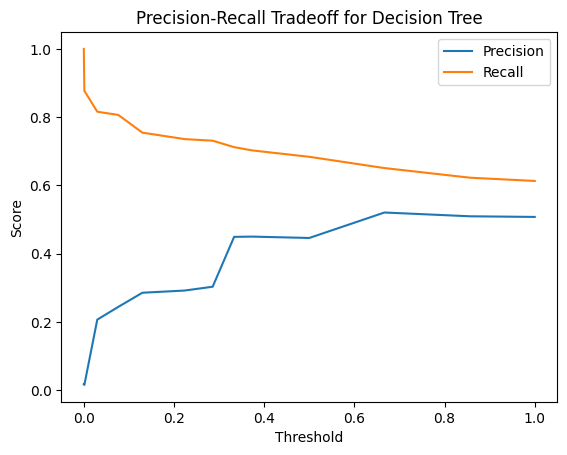

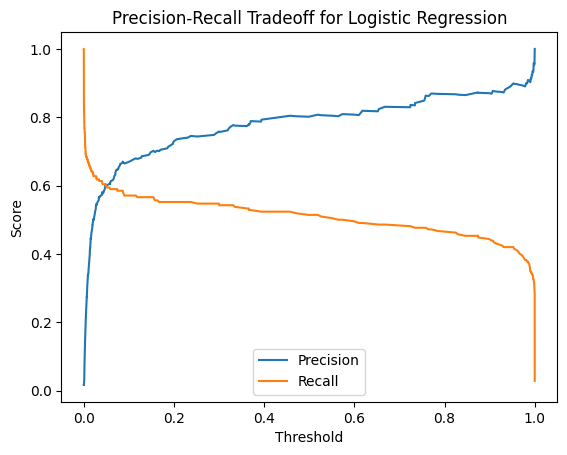

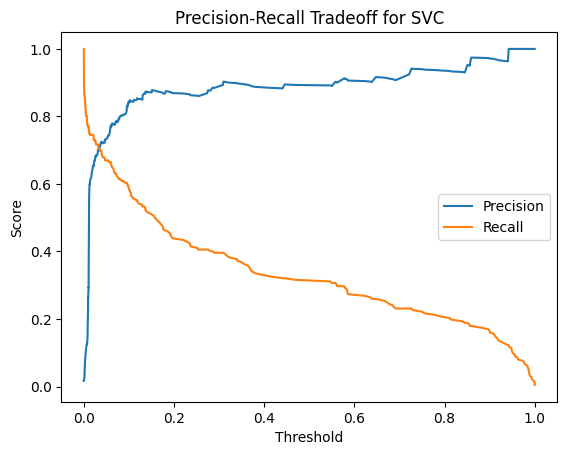

In [62]:
for i in range(3):
    plt.plot(thresholds[i], precision[i][:-1], label="Precision")
    plt.plot(thresholds[i], recall[i][:-1], label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"Precision-Recall Tradeoff for {model_labels[i]}")
    plt.legend()
    plt.show()

Now applying the optimal thresholds for each model

In [63]:
for i in range(3):
    y_pred_optimal = (y_probs[i] >= optimal_threshold[i]).astype(int)
    print(f"{model_labels[i]}:Tuned threshold (", optimal_threshold[i], "):\n", classification_report(y_test, y_pred_optimal))

Decision Tree:Tuned threshold ( 0.6666666666666666 ):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11788
           1       0.52      0.65      0.58       212

    accuracy                           0.98     12000
   macro avg       0.76      0.82      0.79     12000
weighted avg       0.99      0.98      0.98     12000

Logistic Regression:Tuned threshold ( 0.33123563150574376 ):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     11788
           1       0.78      0.54      0.64       212

    accuracy                           0.99     12000
   macro avg       0.88      0.77      0.82     12000
weighted avg       0.99      0.99      0.99     12000

SVC:Tuned threshold ( 0.05957989545606008 ):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     11788
           1       0.77      0.67      0.71       212

    accuracy       

We can see the above hacked classifiers perform better than the base estimators